In [6]:
colors = [ '#4cb963','#57c4e5', '#783f8e', '#ff5964','#BB9F06','#FFB8D1','#A26769','#084B83','#485665','#D972FF','#DEFFFC','#89023E','#F1ECCE','#474B24','#5FBB97','#B2ABBF','#FCF0CC']

In [92]:
from sage.combinat.cartesian_product import CartesianProduct_iters, CartesianProduct
import sympy as spy
import numpy as np

class Plano:
    
    def __init__(self, order):
        self.order = order
        self.field = GF(order)
        self.eField = self.getSortField()
        self.points = CartesianProduct_iters(self.eField,self.eField)
        self.__mainLines()
        self.__allLines()
        self.vcartesian = np.vectorize(Point.getCartesian,excluded=['G']) 
        self.vcartesian.excluded.add(1)
                
    def getMainLines(self):
        return self.mainLines
    
    def getMainLinesList(self):
        return self.mainLinesList
    
    def getLines(self):
        return self.lines
    
    def getCartesianMainLinesList(self):
        return self.vcartesian(self.mainLinesList, self.eField)
    
    def getCartesianLines(self):
        return self.vcartesian(self.lines, self.eField)
    
    def __allLines(self):
        all_lines = []
        for mainLine in self.mainLines:
            all_lines.append(np.array(mainLine.getParallelLines()))
            
        self.lines =  all_lines
    
    
    def __mainLines(self):
        mainLines = list()
        mainLinesList = list()
        aPoints = np.reshape(np.array(self.points),[self.order,self.order,2])
        
        for dirP in aPoints[1,:]: 
            line =Line(dirP, self.eField)
            mainLines.append(line)
            mainLinesList.append(line.toList())
        
        line = Line(aPoints[0,:][1], self.eField)
        mainLines.append(line)
        mainLinesList.append(line.toList())
        self.mainLines = mainLines
        self.mainLinesList = mainLinesList
        
    def getOrder(self):
        return self.order
    
    def getField(self):   
        return self.field
    
    def getSortField(self):
        return Point.merge_sort(Point,(list(self.field)))
    
    def getPoints(self):
        return self.points
    
    def getNumbersValuesField(self,field):

        return self.vcartesian(field, field), field
    



In [98]:
class Line:
    
    def __init__(self, dirP, field):
        self.dirP= dirP
        self.field = field
        self.line = self.__generetaLine()
        self.parallelLines = self.__parallelLines()
        
    
    def __generetaLine(self):
        product = lambda a,t: t*a;
        vproduct = np.vectorize(product,  excluded=['a'])
        vproduct.excluded.add(0)
        
        return Point.merge_sort(Point,vproduct(self.dirP,self.field))
    
    def __parallelLines(self):
        
        lines = []

        for i in self.field:
            
            if self.line[1][0] == 0: 
                lines.append(Point.merge_sort(Point,self.dilatation(self.line,i,0,1)))
            elif self.line[1][1] == 0:
                lines.append(Point.merge_sort(Point,self.dilatation(self.line,0,i,1)))
            else:
                lines.append(Point.merge_sort(Point,self.dilatation(self.line,i,0,1)))
        
        return lines
    
    
        
    def dilatation(self, l,a,b,y): #define una dilatacion como se especifica arriba
        return y*l + np.array([a,b])
    
    def getDirP(self):
        return self.dirP
    
    def toList(self):
        return self.line
    
    def getParallelLines(self):
        return self.parallelLines

In [627]:
class Point:
    def __init__(self,x,y, field):
        self.x = x
        self.y = y
        self.field = field
        
        
    def getX(self):
        return self.x

    def getY(self):
        return self.y
    
    def getXY(self):
        return np.array([self.x, self.y])

    @staticmethod
    def getCartesian(a, G):
        valor = 0
        for i in range(len(G)):
            if(a == G[i]):
                valor = i
        return valor
    @staticmethod
    def merge_sort(self, array):
    # If the input array contains fewer than two elements,
    # then return it as the result of the function
        if len(array) < 2:
            return array


        midpoint = len(array) // 2

        # Sort the array by recursively splitting the input
        # into two equal halves, sorting each half and merging them
        # together into the final result
        return self.__merge(
            left=Point.merge_sort(self,array[:midpoint]),
            right=Point.merge_sort(self,array[midpoint:]))

    def __merge(left, right):
        # If the first array is empty, then nothing needs
        # to be merged, and you can return the second array as the result
        #print('l',left,'r', right)
        if len(left) == 0:
            return right

        # If the second array is empty, then nothing needs
        # to be merged, and you can return the first array as the result
        if len(right) == 0:
            return left

        result = []
        index_left = index_right = 0


        # Now go through both arrays until all the elements
        # make it into the resultant array
        while len(result) < len(left) + len(right):
            # The elements need to be sorted to add them to the
            # resultant array, so you need to decide whether to get
            # the next element from the first or the second array
            try:
                condition = left[index_left][0] <= right[index_right][0]
            except:
                condition = left[index_left] <= right[index_right]

            if condition:
                result.append(left[index_left])
                index_left += 1
            else:
                result.append(right[index_right])
                index_right += 1

            # If you reach the end of either array, then you can
            # add the remaining elements from the other array to
            # the result and break the loop
            if index_right == len(right):
                #print(result,left,right)
                for i in left[index_left:]:
                    result.append(i)
                break

            if index_left == len(left):
                #print(result,left,right)
                for i in right[index_right:]:
                    result.append(i)
                break

        #print(result)

        return result
        
    

In [628]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt

order=[2,3,4,5,7,8,9,11,13,16]
vPlane = np.vectorize(Plano)
planos = vPlane(order)
planosDict = dict(zip(order, planos))


wOption = widgets.Dropdown(options = ['one line dir', 'all dir', 'all lines dir'])
wOrder = widgets.Dropdown(options = order)
wSetLinesDir = widgets.Dropdown(options=[])

# Updates the image options based on directory value

def update_order(*args):
    if wOption.value == 'one line dir' or wOption.value == 'all dir':
        wSetLinesDir.options =[]
    else:  
        wSetLinesDir.options =np.arange(wOrder.value+1).tolist()
    
def update_option(*args):
    if wOption.value == 'one line dir' or wOption.value == 'all dir':
        wSetLinesDir.options =[]
    else:  
        wSetLinesDir.options =np.arange(wOrder.value+1).tolist()


# Tie the image options to directory value
wOrder.observe(update_order, 'value')
wOption.observe(update_option, 'value')


def interactive_plot_plane(option, order,set_lines_dir): 
    myPlots = PlotPlanes(order, 8, colors, '')
    if  wOption.value == 'one line dir':
        myPlots.plot_lines_set(planosDict[order].getCartesianMainLinesList(), False)
    elif wOption.value == 'all dir':
        myPlots.plot_plano(planosDict[order].getCartesianLines())
    else:
        myPlots.plot_dir(planosDict[order].getCartesianLines()[set_lines_dir],set_lines_dir)

        
    
_ = interact(interactive_plot_plane, order=wOrder, set_lines_dir=wSetLinesDir, option = wOption)


In [731]:
class PlotPlanes:
    def __init__(self, ngrid,size,colors,folder):
        self.ngrid = ngrid
        self.size = size
        self.colors = colors
        self.folder = folder
        
    def plot_lines_set(self, lines, sort):
        npoints = self.ngrid

        fig, ax = plt.subplots(figsize=(self.size, self.size))

        xpoint = np.matrix(np.arange(npoints))
        ax.set_facecolor("black")

        plt.xticks(np.arange(0, self.ngrid+1, 1.0))
        plt.yticks(np.arange(0, self.ngrid+1, 1.0))

        for i in range(npoints):
            ax.plot(xpoint, np.ones(len(xpoint))*i, '*',color = 'r')

        for i in range(len(lines)):
            if sort:
                line = np.array(merge_sort(lines[i]))
            else:
                line = np.array((lines[i]))
            ax.plot(line[:,0],line[:,1], color = self.colors[i])

        plt.show()

        fig.savefig(f'{self.folder}linasPrincipalesCadaDireccion{npoints}.png')
        fig.savefig(f'{self.folder}linasPrincipalesCadaDireccion{npoints}.svg')
        
    def plot_plano(self, alines):
        npoints = self.ngrid
        xpoint = np.matrix(np.arange(npoints))


        fig, ax = plt.subplots(figsize=(self.size, self.size))
        plt.xticks(np.arange(0, self.ngrid+1, 1.0))
        plt.yticks(np.arange(0, self.ngrid+1, 1.0))

        xpoint = np.matrix(np.arange(npoints))
        ax.set_facecolor("black")

        for i in range(len(alines)):
            for j in range(npoints):
                ax.plot(xpoint, np.ones(len(xpoint))*j, '*',color = 'r')
            for line in alines[i]:
                lineO = np.array((line))
                ax.plot(line[:,0],line[:,1], color = self.colors[i])

        plt.show()
        fig.savefig(f'{self.folder}tpdoElPlano.png')
        fig.savefig(f'{self.folder}tpdoElPlano.svg')
        
    def plot_dir(self,dirP, color):
        fig, ax = plt.subplots(figsize=(self.size, self.size))

        xpoint = np.matrix(np.arange(self.ngrid))
        ax.set_facecolor("black")

        plt.xticks(np.arange(0, self.ngrid+1, 1.0))
        plt.yticks(np.arange(0, self.ngrid+1, 1.0))

        for i in range(self.ngrid):
            ax.plot(xpoint, np.ones(len(xpoint))*i, '*',color = 'r')    

        for line in dirP:
            lineO = np.array(line)
            ax.plot(lineO[:,0],lineO[:,1], color = self.colors[color])
            
        plt.show()
        fig.savefig(f'{self.folder}linasDireccion{i}.png')
        fig.savefig(f'{self.folder}linasDireccion{i}.svg')      

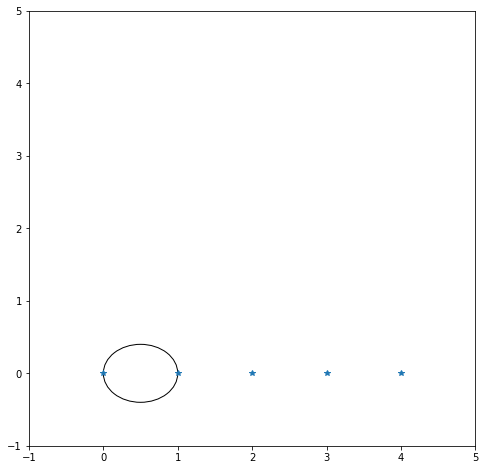

In [19]:
from matplotlib import patches

e1 = patches.Arc(xy=(0.5, 0), width=1, height=0.8,zorder = 2,angle=0, theta1=0, theta2=180)
e2 = patches.Arc(xy=(0.5, 0), width=1, height=0.8,zorder = 2,angle=0, theta1=180, theta2=0)

fig, ax =  plt.subplots(figsize = (8,8))

ax.set_xlim([-1,5])
ax.set_ylim([-1,5])

ax.plot(np.arange(0,5), np.zeros(5),'*')

ax.add_patch(e1)
ax.add_patch(e2)

plt.show()



In [520]:
def determinate_translation(p1, p2):
    alpha = p2.getX() - p1.getX()
    beta = p2.getY() - p1.getY()
    

    return np.array([alpha,beta,1])


def determinate_homotecy(p1,p2,p3, order):
        
    b = vector( [p2.getX(), p2.getY(), p3.getX()])
    a = Matrix( [[1, 0, p1.getX()],[0,1,p1.getY()],[1,0,p3.getX()]])
    
    print(a,b)

    return a.solve_right(b) 

order = 3
F = Point.merge_sort(Point,list(GF(order)))

print(F)

p1 = Point(F[0],F[0],F)
p2 = Point(F[2],F[2],F)
p3 = Point(F[1],F[1],F)

#p2 = Point(2,2,GF(5))
#p3 = Point(3,3,GF(5))
#p1 = Point(1,1,GF(5))

translation = determinate_translation(p1, p2)
homotecy = determinate_homotecy(p1, p2,p3, 4)


print('homotw',translation)
print('homotw',p1.getXY()*translation[2] + translation[:2])




[0, 1, 2]
[1 0 1]
[0 1 1]
[1 0 0] (2, 2, 0)
homotw [1 1 1]
homotw [2 2]


$(1,2)= (3,4) + (\alpha, \beta)$ 

$(1,1) = \gamma*(1,1) + (\alpha,\beta)$

$(3,3) = \gamma*(2,2) + (\alpha,\beta)$

$(0,2) = \gamma*(0,2) + (\alpha,\beta)$

$(2,0) = \gamma*(1,1) + (\alpha,\beta)$

In [743]:

order = 5
F = Point.merge_sort(Point,list(GF(order)))

print(F)

p1 = Point(F[0],F[0],F)
p2 = Point(F[2],F[2],F)
p3 = Point(F[1],F[1],F)

translation = determinate_translation(p1, p2)
homotecy = determinate_homotecy(p1, p2, p3, order)


F2 = CartesianProduct_iters(F,F)
aF2 = np.array(list(F2))
tupleF2 = list(map(tuple, aF2))
tF2 = aF2*translation[2] + translation[:2]
hF2 = aF2*homotecy[2] + homotecy[:2]



print(p1.getXY()*homotecy[2] + homotecy[:2])




[0, 1, z2, z2 + 1]
[1 0 0]
[0 1 0]
[1 0 1] (z2, z2, 1)
[z2 z2]


[1 0 1]
[0 1 1]
[1 0 0] (z2, z2, 0)
(0, 0, z2)
2.0 1.5 -26 2.23606797749979 0.35777087639996635 2 -1 3 1 1 2
2.0 2.5 -26 2.23606797749979 0.35777087639996635 2 -1 3 2 1 3


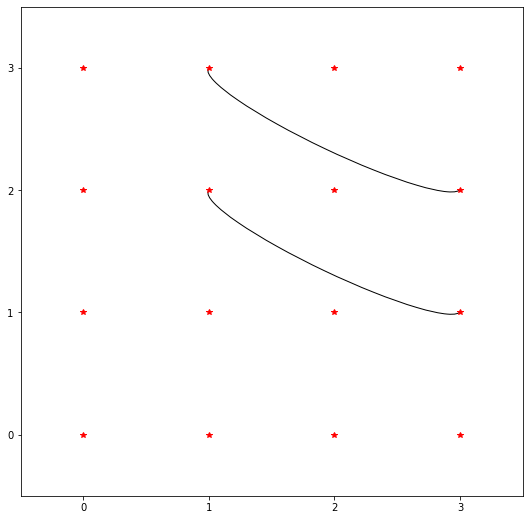

In [1118]:
def plot_translation(F2, tF2, ngrid,size,F,folder,i):
    npoints = ngrid
    
    fig, ax = plt.subplots(figsize=(size, size))
    plt.xticks(np.arange(0, ngrid+1, 1.0))
    plt.yticks(np.arange(0, ngrid+1, 1.0))

    xpoint = np.matrix(np.arange(npoints))
    ones = np.matrix(np.ones(npoints))
    #ax.set_facecolor("black")
    
    ax.plot(np.transpose(xpoint), np.transpose(ones)*xpoint, '*',color = 'r')
    

    arcP = get_arc(F2[3:4,0],F2[3:4,1],tF2[3:4,0],tF2[3:4,1],F)
    


    arc = vget_arc(F2[:,0],F2[:,1],tF2[:,0],tF2[:,1],F)
    
    #pos = 3
    
    
    for pos in list(range(13,15)):
        x1 = Point.getCartesian(F2[pos,0], F)
        x2 = Point.getCartesian(tF2[pos,0], F)
        
        y1 = Point.getCartesian(F2[pos,1], F)
        y2 = Point.getCartesian(tF2[pos,1], F)
        
        deltaX = Point.getCartesian(F2[pos,0], F)-Point.getCartesian(tF2[pos,0], F)
        deltaY = Point.getCartesian(F2[pos,1], F)-Point.getCartesian(tF2[pos,1], F)
        print(arc[0][pos],arc[1][pos],arc[2][pos],arc[3][pos],arc[4][pos], deltaX,deltaY,x1,y1,x2,y2)
 
        if deltaY == 0 and deltaX<0:
            e1 = patches.Arc(xy=(arc[0][pos], arc[1][pos]), width=arc[3][pos], height=arc[4][pos],zorder = 2,angle=arc[2][pos], theta2=arc[5][pos], theta1=arc[6][pos])
        elif (deltaX>0 and deltaY>0 and np.abs(deltaX)<=np.abs(deltaY))or (deltaX<0 and deltaY<0 and np.abs(deltaX)>np.abs(deltaY)) :
            e1 = patches.Arc(xy=(arc[0][pos], arc[1][pos]), width=arc[3][pos], height=arc[4][pos],zorder = 2,angle=arc[2][pos], theta2=arc[5][pos], theta1=arc[6][pos])
        elif ((deltaX>0 and deltaY<0 and np.abs(deltaY)<=np.abs(deltaX) ) or(deltaX<0 and deltaY>0 and np.abs(deltaY)>np.abs(deltaX)))and arc[2][pos]<0: 
            e1 = patches.Arc(xy=(arc[0][pos], arc[1][pos]), width=arc[3][pos], height=arc[4][pos],zorder = 2,angle=arc[2][pos], theta2=arc[5][pos], theta1=arc[6][pos])
        else:
            e1 = patches.Arc(xy=(arc[0][pos], arc[1][pos]), width=arc[3][pos], height=arc[4][pos],zorder = 2,angle=arc[2][pos], theta1=arc[5][pos], theta2=arc[6][pos])

        #help(e1)
        
        ax.add_patch(e1)
        #ax.add_patch(e2)
    


    ax.set_xlim([-0.5,order-0.5])
    ax.set_ylim([-0.5,order-0.5])


    #ax.add_patch(e2)/
    
    fig.savefig(f'{folder}dilatacion{i}.png')
    fig.savefig(f'{folder}dilatacion{i}.svg') 

    plt.show()
    

order = 4
F = Point.merge_sort(Point,list(GF(order)))

p1 = Point(F[1],F[1],F)
p2 = Point(F[2],F[2],F)
p3 = Point(F[0],F[0],F)

translation = determinate_translation(p1, p2)
homotecy = determinate_homotecy(p1, p2, p3, order)

F2 = CartesianProduct_iters(F,F)
aF2 = np.array(list(F2))

tF2 = aF2 + translation[:2]
hF2 = aF2*homotecy[2] + homotecy[:2]


print(homotecy)



vcartesian = np.vectorize(Point.getCartesian,excluded=['G']) 
vcartesian.excluded.add(1)

plot_translation(aF2, hF2, order,9 ,F, 'P16Dilataciones/', 6 )

In [899]:
def get_arc(x1,y1,x2,y2, F):    
    midX = (Point.getCartesian(x1, F) - Point.getCartesian(x2,F))/2
    midY = (Point.getCartesian(y1, F) - Point.getCartesian(y2,F))/2
    
    
    width = np.sqrt((2*midX)**2 + (2*midY)**2)
    height = width*0.16
    
    xCenter = midX+Point.getCartesian(x2,F)
    yCenter =  midY + Point.getCartesian(y2,F)
    
    angle0 = 0
    anglef = 180
    
    if width == 0:
        
        width = 0.3
        height = 0.3
        
        xCenter += width*0.38
        yCenter += height*0.38
        
        anglef = 360
        
    try:
        angle = np.arctan(midY/midX)*180/np.piaunaunque si quis
    except ZeroDivisionError:
        if(midY < 0):
            angle = -90
        elif midY>0:
            angle = 90
        else:
            angle =0
            


        
    return 1.0*xCenter, 1.0*yCenter, angle,width, height,angle0,anglef


vget_arc = np.vectorize(get_arc,excluded=['F']) 
vget_arc.excluded.add(4)